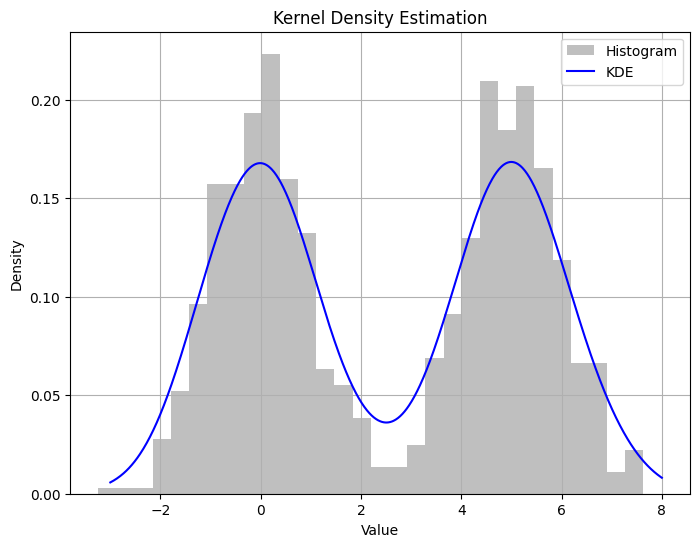

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate sample data
np.random.seed(42)  # For reproducibility
sample_data = np.concatenate([
    np.random.normal(loc=0, scale=1, size=500),
    np.random.normal(loc=5, scale=1, size=500)
])

# Perform Kernel Density Estimation
kde = gaussian_kde(sample_data)
x_values = np.linspace(-3, 8, 1000)  # Points at which to evaluate the KDE
kde_values = kde(x_values)

# Plot the results
plt.figure(figsize=(8, 6))
plt.hist(sample_data, bins=30, density=True, alpha=0.5, color='gray', label='Histogram')
plt.plot(x_values, kde_values, color='blue', label='KDE')
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

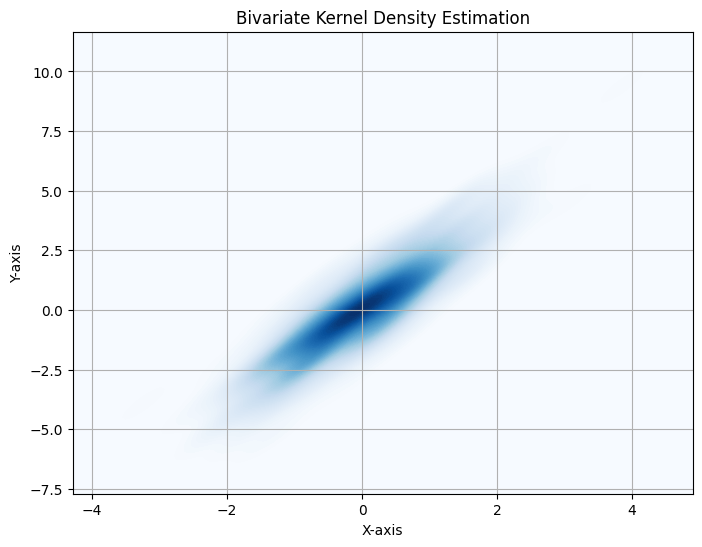

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate bivariate sample data
np.random.seed(42)  # For reproducibility
x = np.random.normal(size=500)
y = 2 * x + np.random.normal(size=500)

# Create a bivariate KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, thresh=0, levels=100)
plt.title('Bivariate Kernel Density Estimation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


In [6]:
pip install --upgrade bokeh


In [8]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.tiles import WMTSTileSource

# Enable Bokeh to display in notebook
output_notebook()

# Generate geospatial data (latitude and longitude)
np.random.seed(42)
latitude = np.random.uniform(-90, 90, 100)
longitude = np.random.uniform(-180, 180, 100)

# Convert latitude and longitude to Web Mercator projection
# Web Mercator formula for conversion
k = 6378137  # Earth's radius in meters
x = longitude * (k * np.pi / 180.0)
y = np.log(np.tan((90 + latitude) * np.pi / 360.0)) * k

data = ColumnDataSource(data={"x": x, "y": y})

# Create a Bokeh figure with tile provider
p = figure(
    title="Geospatial Data Visualization",
    x_axis_type="mercator",
    y_axis_type="mercator",
    width=800,
    height=600
)
# Use WMTS Tile Source for the tile provider
tile_provider = WMTSTileSource(url='http://c.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png')
p.add_tile(tile_provider)

# Add data points to the plot
p.circle(x="x", y="y", size=10, color="blue", alpha=0.7, source=data)

# Show the plot
show(p)


In [10]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.tiles import WMTSTileSource
import networkx as nx

# Enable Bokeh to display in notebook
output_notebook()

# Generate geospatial data (latitude and longitude)
np.random.seed(42)
latitude = np.random.uniform(-90, 90, 10)
longitude = np.random.uniform(-180, 180, 10)

# Convert latitude and longitude to Web Mercator projection
k = 6378137  # Earth's radius in meters
x = longitude * (k * np.pi / 180.0)
y = np.log(np.tan((90 + latitude) * np.pi / 360.0)) * k

# Create a graph representing interconnections between points
graph = nx.Graph()
for i, (xi, yi) in enumerate(zip(x, y)):
    graph.add_node(i, x=xi, y=yi)
    if i > 0:
        graph.add_edge(i - 1, i)  # Connect consecutive nodes

# Extract node and edge positions
node_x = [graph.nodes[n]['x'] for n in graph.nodes]
node_y = [graph.nodes[n]['y'] for n in graph.nodes]
edge_x = []
edge_y = []
for i, j in graph.edges():
    edge_x.extend([graph.nodes[i]['x'], graph.nodes[j]['x'], None])
    edge_y.extend([graph.nodes[i]['y'], graph.nodes[j]['y'], None])

# Create a Bokeh figure with tile provider
p = figure(
    title="Network and Interconnection Visualization",
    x_axis_type="mercator",
    y_axis_type="mercator",
    width=800,
    height=600
)
# Use WMTS Tile Source for the tile provider
tile_provider = WMTSTileSource(url='http://c.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png')
p.add_tile(tile_provider)

# Add edges and nodes to the plot
p.line(x=edge_x, y=edge_y, line_width=2, color="red", alpha=0.5, legend_label="Edges")
p.circle(x=node_x, y=node_y, size=10, color="blue", alpha=0.7, legend_label="Nodes")

# Show the plot
show(p)


Displaying the retrieved image:


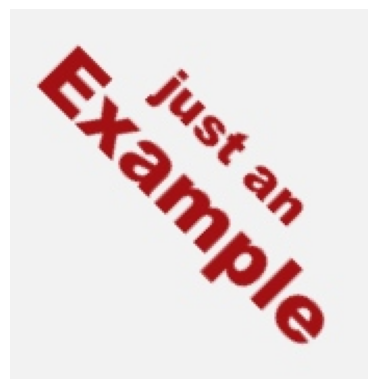

Parsed HTML content:
<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Wikipedia
  </title>
  <meta content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation." name="description"/>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
  </script>
  <meta content="initial-scale=1,user-scalable=yes" name="viewport"
Element 1:
Web scraping,web harvesting, orweb data extractionisdata scrapingused forextracting datafromwebsites.[1]Web scraping software may directly access theWorld Wide Webusing theHypertext Transfer Protocolor a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using abotorweb crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a cen

In [13]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def retrieve_image_over_http(url):
    """Retrieve an image over HTTP and display it."""
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            print("Displaying the retrieved image:")
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print(f"Failed to retrieve image. Status code: {response.status_code}")
    except requests.RequestException as e:
        print(f"An error occurred while retrieving the image: {e}")

def parse_html(url):
    """Parse HTML content from a URL."""
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            print("Parsed HTML content:")
            print(soup.prettify()[:500])  # Display the first 500 characters of parsed HTML
        else:
            print(f"Failed to retrieve HTML. Status code: {response.status_code}")
    except requests.RequestException as e:
        print(f"An error occurred while retrieving the HTML: {e}")

def scrape_web(url, tag, class_name=None):
    """Scrape specific elements from a web page."""
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            if class_name:
                elements = soup.find_all(tag, class_=class_name)
            else:
                elements = soup.find_all(tag)
            for i, element in enumerate(elements[:5]):  # Display the first 5 elements
                print(f"Element {i+1}:")
                print(element.get_text(strip=True))
        else:
            print(f"Failed to scrape web page. Status code: {response.status_code}")
    except requests.RequestException as e:
        print(f"An error occurred while scraping the web page: {e}")

# Example usage
if __name__ == "__main__":
    # Retrieve and display an image
    image_url = "https://upload.wikimedia.org/wikipedia/commons/a/a9/Example.jpg"  # Replace with a real image URL
    retrieve_image_over_http(image_url)

    # Parse HTML
    html_url = "https://www.wikipedia.org"  # Replace with a real webpage URL
    parse_html(html_url)

    # Scrape web content
    scrape_url = "https://en.wikipedia.org/wiki/Web_scraping"  # Replace with a real webpage URL
    scrape_web(scrape_url, "p")
